<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/Emilia_Xray_Goes_NETCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import requests
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#
# uload Arquivo do site...
#
!wget https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes17/l2/data/xrsf-l2-flx1s/2022/04/dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc

--2022-04-12 12:11:58--  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes17/l2/data/xrsf-l2-flx1s/2022/04/dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc
Resolving data.ngdc.noaa.gov (data.ngdc.noaa.gov)... 140.172.190.8
Connecting to data.ngdc.noaa.gov (data.ngdc.noaa.gov)|140.172.190.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5119839 (4.9M) [application/x-netcdf]
Saving to: ‘dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc’

dn_xrsf-l2-flx1s_g1 100%[===================>]   4.88M  1.36MB/s    in 3.6s    

2022-04-12 12:12:03 (1.36 MB/s) - ‘dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc’ saved [5119839/5119839]



In [3]:
#
# Read Arquivo local...
#
nc4_ds = netCDF4.Dataset('/content/dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc')
store = xr.backends.NetCDF4DataStore(nc4_ds)
DS = xr.open_dataset(store)

In [6]:
#
# Save netcdf
#
fname = '/content/my_netcdf.nc'
DS.to_netcdf(fname)

In [8]:
#
# Download netcdf
#
from google.colab import files

download = input('Download? (y|n) ')
if download == 'y':
  files.download(fname)

Download? (y|n) n


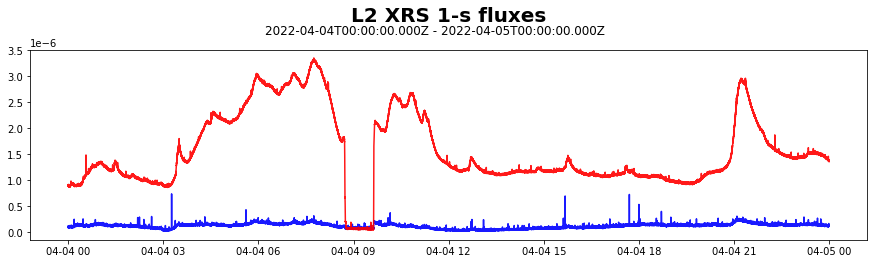




The X-Ray 1s flux product consists of high resolution solar X ray flux measurements from the EXIS X-Ray Sensor (XRS
). XRS measures in a short wavelength channel (XRS-A) between 0.05 and 0.4 nm and in a longer wavelength channel (X
RS-B) between 0.1 and 0.8 nm. To span the full dynamic x-ray irradiance range over the solar cycle, each channel in
cludes a solar minimum photodiode (A1, B1) and a solar maximum quadrant photodiode set (A2, B2). This product inclu
des irradiance and flag values for A1, A2, B1 and B2. Primary channels, A and B, are also provided associated, data
 quality flags, and a flag to indicate whether the solar minimum or maximum photodiodes are used as the primary cha
nnel. Non-archive versions of this file include the ratio of the primary XRS-A and -B channels and a quality flag f
or the ratio. There is also a time stamp for the start of each record which is derived from the L1b center time sta
mp and includes any needed corrections. 


In [9]:
plt.figure(figsize=(15,3.5))

plt.plot(DS['time'][:],DS['xrsa_flux'][:],color='b',alpha=0.9)
plt.plot(DS['time'][:],DS['xrsb_flux'][:],color='r',alpha=0.9)
plt.title(DS.attrs['title'] + '\n', fontsize=20,weight='bold')
plt.suptitle(str(DS.attrs['time_coverage_start']) + ' - ' + str(DS.attrs['time_coverage_end']))

plt.show()

print('\n\n')

linelen = 115
for i in range(0,len(DS.attrs['summary']),linelen):
  print(DS.attrs['summary'][i:i+linelen])

In [10]:
DS

<xarray.Dataset>
Dimensions:                  (quad_diode: 4, time: 86400)
Coordinates:
  * time                     (time) datetime64[ns] 2022-04-03T23:59:59.733027...
Dimensions without coordinates: quad_diode
Data variables: (12/19)
    xrsa_flux                (time) float32 ...
    xrsb_flux                (time) float32 ...
    xrsa1_flux               (time) float32 ...
    xrsa2_flux               (time) float32 ...
    xrsb1_flux               (time) float32 ...
    xrsb2_flux               (time) float32 ...
    ...                       ...
    xrsb2_flags              (time) float32 ...
    corrected_current_xrsa2  (time, quad_diode) float32 ...
    corrected_current_xrsb2  (time, quad_diode) float32 ...
    au_factor                (time) float32 ...
    roll_angle               (time) float32 ...
    yaw_flip_flag            (time) float32 ...
Attributes: (12/47)
    Conventions:                   ACDD-1.3, Spase v2.2.6
    title:                         L2 XRS 1-s fluxes
    summary:                       The X-Ray 1s flux product consists of high...
    keywords:                      NumericalData.MeasurementType.Irradiance
    keywords_vocabulary:           SPASE: Space Physics Archive Search and Ex...
    naming_authority:              gov.nesdis.noaa
    ...                            ...
    algorithm_date:                2020-06-08
    input_system_environments:     ops
    input_files_first:             ops_exis-l1b-sfxr_g17_d20220404_v0-0-0.nc
    input_files_last:              ops_exis-l1b-sfxr_g17_d20220404_v0-0-0.nc
    input_files_total:             1
    L1b_LUT_Filenames:             XRS_Cal_INR(FM2A_CDRL79RevK_PR_09_08_01)-6...

In [11]:
DS.keys()

KeysView(<xarray.Dataset>
Dimensions:                  (quad_diode: 4, time: 86400)
Coordinates:
  * time                     (time) datetime64[ns] 2022-04-03T23:59:59.733027...
Dimensions without coordinates: quad_diode
Data variables: (12/19)
    xrsa_flux                (time) float32 9.334e-08 1.027e-07 ... 1.196e-07
    xrsb_flux                (time) float32 8.918e-07 9.015e-07 ... 1.36e-06
    xrsa1_flux               (time) float32 9.334e-08 1.027e-07 ... 1.196e-07
    xrsa2_flux               (time) float32 1.122e-07 -2.244e-08 ... 1.456e-07
    xrsb1_flux               (time) float32 8.918e-07 9.015e-07 ... 1.36e-06
    xrsb2_flux               (time) float32 8.481e-07 8.713e-07 ... 1.303e-06
    ...                       ...
    xrsb2_flags              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    corrected_current_xrsa2  (time, quad_diode) float32 ...
    corrected_current_xrsb2  (time, quad_diode) float32 ...
    au_factor                (time) float32 0.9999 0.9

In [12]:
DS.attrs

{'Conventions': 'ACDD-1.3, Spase v2.2.6',
 'L1b_LUT_Filenames': 'XRS_Cal_INR(FM2A_CDRL79RevK_PR_09_08_01)-677124500.0.h5 SPS_Cal_INR(FM2A_CDRL79RevK_PR_09_08_01)-677124500.0.h5 Yearly_1AU_Correction_Table(2022)-694267200.0.h5',
 'L1b_production_site': 'WCDAS',
 'L1b_system_environment': 'OE',
 'algorithm': 'cli-xrs05_1s',
 'algorithm_date': '2020-06-08',
 'algorithm_parameters': 'None',
 'algorithm_version': array([1, 1]),
 'creator_email': 'goesr.exis@noaa.gov',
 'creator_institution': 'DOC/NOAA/NESDIS/NCEI/OGSSD/STP',
 'creator_name': 'Janet Machol',
 'creator_type': 'person',
 'creator_url': 'https://www.ncei.noaa.gov/',
 'date_created': '2022-04-11T15:51:43.823Z',
 'history': 'See algorithm information.',
 'id': 'dn_xrsf-l2-flx1s_g17_d20220404_v2-1-0.nc',
 'input_files_first': 'ops_exis-l1b-sfxr_g17_d20220404_v0-0-0.nc',
 'input_files_last': 'ops_exis-l1b-sfxr_g17_d20220404_v0-0-0.nc',
 'input_files_total': 1,
 'input_system_environments': 'ops',
 'institution': 'DOC/NOAA/NESDIS',


In [13]:
DS['xrsa_flux']

<xarray.DataArray 'xrsa_flux' (time: 86400)>
array([9.334470e-08, 1.027376e-07, 1.083605e-07, ..., 1.421748e-07,
       1.280727e-07, 1.196191e-07], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-04-03T23:59:59.733027968 ... 2022-04-...
Attributes:
    long_name:            Primary XRS-A channel flux.
    units:                W/m2
    valid_min:            -5e-07
    valid_max:            0.2
    ancillary_variables:  xrsa_flags

In [14]:
DS['time']

<xarray.DataArray 'time' (time: 86400)>
array(['2022-04-03T23:59:59.733027968', '2022-04-04T00:00:00.733020928',
       '2022-04-04T00:00:01.733021952', ..., '2022-04-04T23:59:57.336284032',
       '2022-04-04T23:59:58.336279040', '2022-04-04T23:59:59.336276992'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-04-03T23:59:59.733027968 ... 2022-04-...
Attributes:
    long_name:  Record start time, neglecting leap seconds.